<h1> Polynomial regression in 1D

So you have some data, and you'd like to get a "best-fit" curve through the data. No problem. That's pretty much what this guide seeks to do. So let's get started; consider the data set below.

$$\begin{array}{cc} \hline
  X &  Y  \\ \hline
         0  &  6.8053 \\
    0.0714  & -1.5184 \\
    0.1429  &  1.6416 \\
    0.2857  &  6.3543 \\
    0.3571  &  14.3442 \\
    0.4286  & 16.4426 \\
    0.5714  &  18.1953 \\
    0.6429  &  28.9913 \\
    0.7143  &  27.2246 \\
    0.7857  &  40.3759 \\
    0.9286  &  55.3726 \\
    1.0000  &  72.0 \\ \hline
\end{array}$$

Our goal is to compute the best fit quadratic polynomial approximation through this data set. We begin by calling two classes from the code. The first class is the Parameter class, that handles all the information regarding the independent variable, or parameter. The second class is the Polynomial class, which actually generates the "best-fit" curve using the information in the parameter. 

In [1]:
%matplotlib inline
from effective_quadratures.polynomial import PolyFit
import numpy as np

We write the X and Y values above as matrices, and refer to them as the 'training' data set.

In [2]:
x_train = np.mat([0,0.0714,0.1429,0.2857,0.3571,0.4286,0.5714,0.6429,0.7143,0.7857,0.9286,1.0000], dtype='float64')
y_train = np.mat([6.8053,-1.5184,1.6416,6.3543,14.3442,16.4426,18.1953,28.9913,27.2246,40.3759,55.3726,72.0], dtype='float64')
x_train = x_train.T
y_train = y_train.T
poly1 = PolyFit(x_train, y_train, 'linear')

Now we now test our model

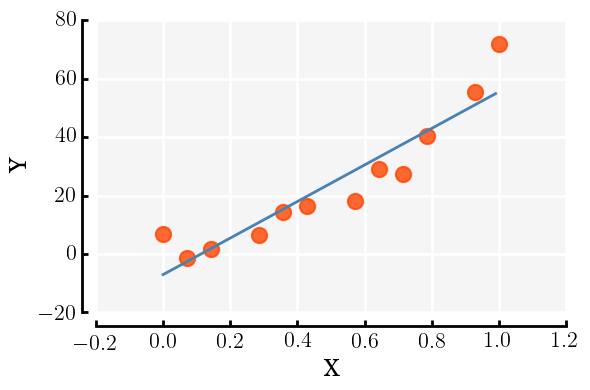

In [3]:
x_test = np.arange(0.0, 1.0, 0.01)
poly1.plot(x_test)

Now, what if we wish to fit a quadratic model to this data set? Simple, just replace the 'linear' option above, with the 'quadratic' one, i.e., 

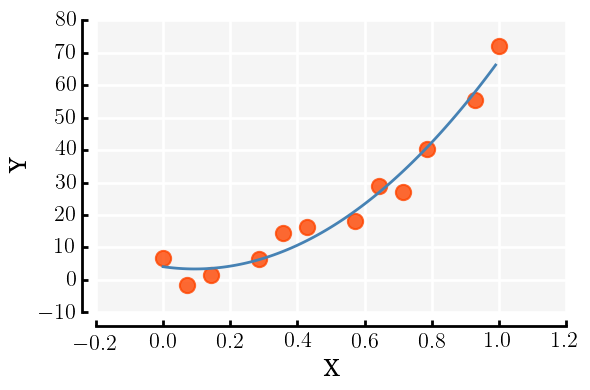

In [4]:
poly2 = PolyFit(x_train, y_train, 'quadratic')
poly2.plot(x_test)

This concludes this simple notebook on 1D polynomial regression!